First install the repo and requirements.

In [ ]:
%pip --quiet install git+https://github.com/wilson-labs/cola.git

# PCA on Massive Datasets

In this example we will show using CoLA to perform PCA on a massive dataset.

In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

import time
import torch
import cola
import jax.numpy as jnp
#from cola.fns import lazify
# from cola.algorithms.svd import randomized_svd

N, D = 100000, 300
dtype = torch.float32
data = torch.randn(N, D, dtype=dtype)
dtype = jnp.float32
#data = jnp.array(data.numpy())

print(f"Dataset (N={data.shape[0]:,d} | D={data.shape[1]:,d})")

k = 50
X = cola.lazify(data)

Dataset (N=100,000 | D=300)


In [6]:
x = torch.linspace(-1,1,100)
C = cola.lazify(torch.exp(-2*(x[None]-x[:,None])**2))
C = C+1e-4*cola.ops.I_like(C)

In [4]:
C = X.T@X/N

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

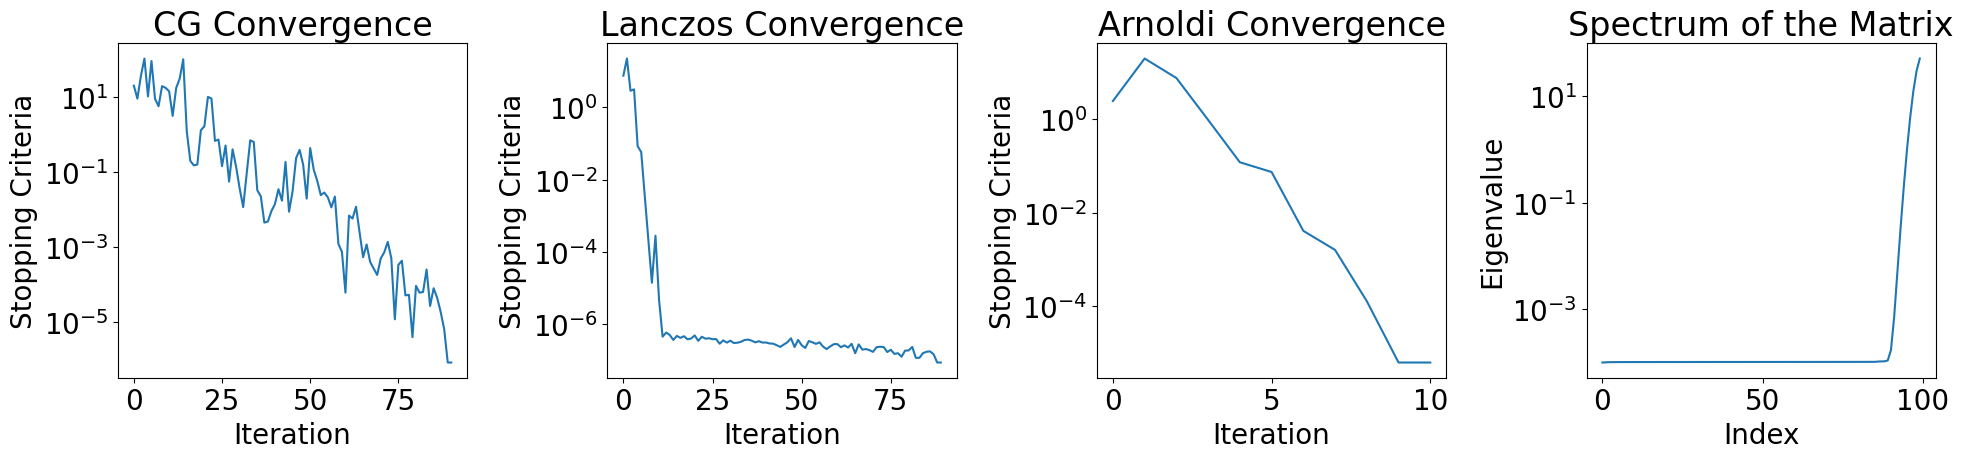

In [9]:
sol, info = cola.algorithms.cg(C, torch.randn(C.shape[-1]), pbar=True)
Q1,T,info2 = cola.algorithms.lanczos(C, pbar=True,max_iters=1000)
Q2,H,info3 = cola.algorithms.arnoldi(C,pbar=True, tol=1e-4,max_iters=1000)
eigs = cola.eig(cola.SelfAdjoint(C),pbar=True)[0]

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20
algorithms = [('CG', info), ('Lanczos', info2), ('Arnoldi', info3)]
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, (name, info) in enumerate(algorithms):
    axs[i].plot(info['errors'])
    axs[i].set_yscale('log')
    axs[i].set_title(f'{name} Convergence')
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel('Stopping Criteria')

axs[3].plot(eigs)
axs[3].set_yscale('log')
axs[3].set_title('Spectrum of the Matrix')
axs[3].set_xlabel('Index')
axs[3].set_ylabel('Eigenvalue')

plt.tight_layout()
plt.show()

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'lanczos convergence on 300x300 matrix')

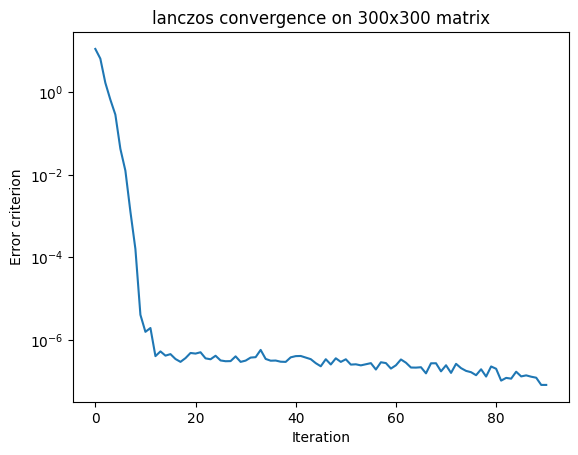

In [36]:
Q,T,info = cola.algorithms.lanczos(C, pbar=True,max_iters=1000)
plt.plot(info['errors'])
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error criterion')
plt.title('lanczos convergence on 300x300 matrix')

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'CG convergence on 300x300 matrix')

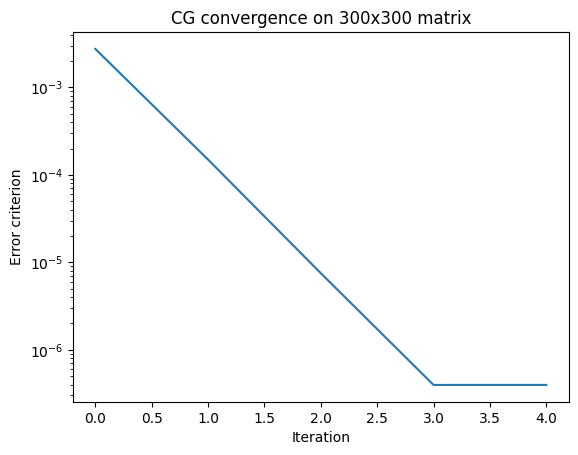

In [31]:
x, info = cola.algorithms.cg(C, torch.randn(C.shape[-1]), pbar=True)
plt.plot(info['errors'])
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error criterion')
plt.title('CG convergence on 300x300 matrix')

Text(0, 0.5, 'Error criterion')

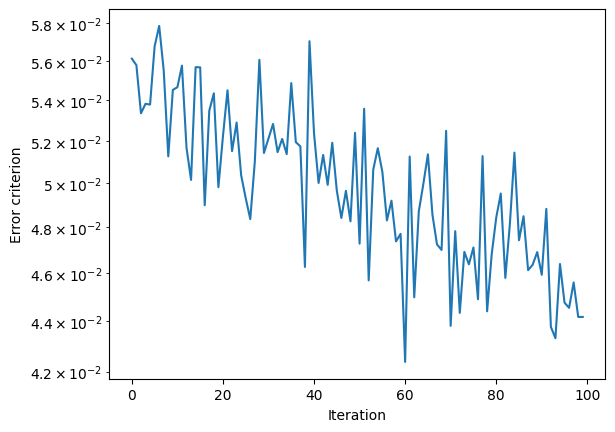

In [19]:
import matplotlib.pyplot as plt
plt.plot(info['errors'])
plt.yscale('log')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error criterion')

In [11]:
eigs = cola.eig(C,pbar=True,tol=1e-4,method='iterative',max_iters=100)[0]

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
eigs = cola.eig(cola.SelfAdjoint(C),pbar=True,tol=1e-6,method='iterative',max_iters=1000)[0]

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
%debug

> /data/users/marc_f/cola/cola/utils/torch_tqdm.py(67)update_pbar()
     65 def update_pbar(error, tol, info):
     66     errstart = info.setdefault('errstart', error)
---> 67     progress = max(100 * np.log(error / errstart) / np.log(tol / errstart) - info['progval'], 0)
     68     progress = min(100 - info['progval'], progress)
     69     if progress > 0:

0.0 0.0 0.0001
0.0 0.0 0.0001
0.0 0.0 0.0001


In [3]:
import jax
P = jax.jit(cola.algorithms.power_iteration, static_argnums=(0,1,2,3,4,5))
a,v, info = P(C,pbar=True,info=True, tol=1e-2)

Running body:   0%|          | 0/100 [00:00<?,?it/s]

In [4]:
info

{}

In [5]:
inv= cola.inverse(cola.SelfAdjoint(C),pbar=True,info=True,method='iterative',tol=1e-2)
inv@C.ops.ones(C.shape[:1],C.dtype)

Running body_fun:   0%|          | 0/100 [00:00<?,?it/s]

Array([1.0324442 , 1.0674736 , 1.0347737 , 0.98613876, 1.1044202 ,
       0.9663931 , 0.971528  , 1.024705  , 1.0205234 , 1.1353885 ,
       1.0444454 , 0.9898392 , 1.0785855 , 1.0788229 , 1.0333313 ,
       1.0048164 , 0.979654  , 1.0294789 , 0.9680885 , 1.0490725 ,
       0.9666235 , 1.0007157 , 0.9818945 , 0.95554715, 1.0527668 ,
       0.95988727, 1.0225154 , 1.0347    , 1.0575426 , 0.91583496,
       0.9738532 , 0.96137923, 1.06761   , 1.1235957 , 0.9693678 ,
       1.072281  , 0.9646544 , 1.033497  , 1.0273887 , 0.95487016,
       1.0309575 , 1.0465803 , 0.9815441 , 0.9269393 , 0.96078527,
       0.9740837 , 1.0166415 , 0.95634097, 0.9290672 , 0.95050204,
       0.95362216, 1.0184866 , 0.9607811 , 1.0713391 , 0.89858437,
       0.97377306, 1.0029553 , 0.99890304, 0.97815055, 1.0609416 ,
       1.020308  , 0.96039903, 1.0276415 , 0.9667356 , 0.99179304,
       1.0198739 , 1.000656  , 1.0265386 , 0.9799702 , 1.0454187 ,
       0.96207404, 0.9343594 , 1.0151007 , 0.9371575 , 1.11296

In [6]:
inv.info

{'errors': array([0.05306752, 0.00300517], dtype=float32),
 'iteration_time': 0.12758525212605795,
 'iterations': Array(2, dtype=int32, weak_type=True)}

In [31]:
U,S,Vh= cola.svd(X, rank=300)

tensor(0.8943) tensor(1.1139)


In [21]:
U2 = (X@Vh.H)/S

In [22]:
torch.linalg.norm(U-U2)

tensor(0.)

In [23]:
print(U.shape,S.shape,Vh.shape,X.shape)

torch.Size([100000, 300]) torch.Size([300]) torch.Size([300, 300]) torch.Size([100000, 300])


In [24]:
diff  = cola.lazify(U)@cola.diag(S)@cola.lazify(Vh) - X

In [25]:
torch.linalg.norm(diff.to_dense())/torch.linalg.norm(X.to_dense())

tensor(1.2632e-06)

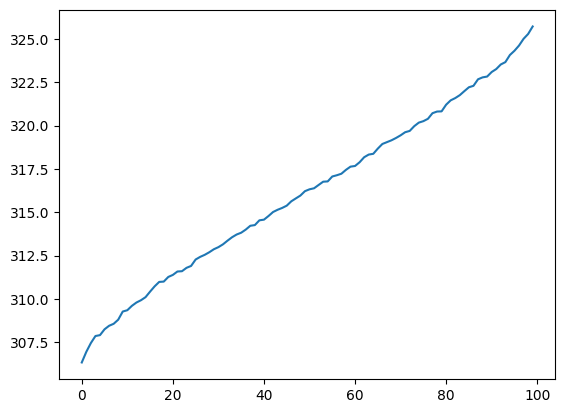

In [8]:
import matplotlib.pyplot as plt
plt.plot(S)

$X X^{T}$